# CHAPTER 2 - Numerical Python (NumPy)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NumPy-Arrays" data-toc-modified-id="NumPy-Arrays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NumPy Arrays</a></span></li><li><span><a href="#Matrices-in-Excel" data-toc-modified-id="Matrices-in-Excel-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matrices in Excel</a></span></li><li><span><a href="#Matrices-in-Python" data-toc-modified-id="Matrices-in-Python-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Matrices in Python</a></span><ul class="toc-item"><li><span><a href="#Vectors-(1D-Arrays)" data-toc-modified-id="Vectors-(1D-Arrays)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Vectors (1D Arrays)</a></span></li><li><span><a href="#Basic-array-maths" data-toc-modified-id="Basic-array-maths-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Basic array maths</a></span></li><li><span><a href="#Matrices-(2D-arrays)" data-toc-modified-id="Matrices-(2D-arrays)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Matrices (2D arrays)</a></span></li><li><span><a href="#Basic-array-addressing:" data-toc-modified-id="Basic-array-addressing:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Basic array addressing:</a></span></li><li><span><a href="#Matrix-Maths" data-toc-modified-id="Matrix-Maths-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Matrix Maths</a></span><ul class="toc-item"><li><span><a href="#Translations" data-toc-modified-id="Translations-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Translations</a></span></li><li><span><a href="#Rotations" data-toc-modified-id="Rotations-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Rotations</a></span></li></ul></li></ul></li><li><span><a href="#Solving-Systems-of-Linear-Equations" data-toc-modified-id="Solving-Systems-of-Linear-Equations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Solving Systems of Linear Equations</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-using-lstsq" data-toc-modified-id="Linear-regression-using-lstsq-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear regression using <code>lstsq</code></a></span></li></ul></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Statistics</a></span></li></ul></div>

 ## 1 NumPy Arrays

You will have covered matrices in your math module last year, but if you need a reminder look at this [HELM Workbook](https://www.lboro.ac.uk/media/media/schoolanddepartments/mlsc/downloads/HELM%20Workbook%207%20Matrices.pdf). You should have briefly covered numpy arrays in Design and Computing last year. 

**Core python does not includes arrays, which means that you need to use the `NumPy` module.** Arrays are very similar to lists, but unlike lists, arrays can only contain variables of a single datatype. This is one of the reasons why array maths is so much more efficient than using lists.

An array is a data structure which contains a group of elements. In the code cell below, both a list and an array are created.
1. You should be able to see that the list contains three integers and a float, whereas the array is all floats.
3. All the elements of an array are of the same datatype, eg integers,floats.  
2.  You can change the dtype for the array and it will change all the elements, for example what happens if you set `dtype=complex`.


In [36]:
import numpy as np
a_list = [1,2,3.0,4]
a_array=np.array([1.0,2.0,3.0,4.0], dtype=float, ndmin=1) #ndmin specified the dimensions of array
print(type(a_list))
print('', a_list)

<class 'list'>
 [1, 2, 3.0, 4]


In [37]:
print(type(a_array))
print(a_array)

<class 'numpy.ndarray'>
[1. 2. 3. 4.]


In [38]:
for n in range(len(a_list)):
    print(type(a_list[n]),'   ',type(a_array[n]))

<class 'int'>     <class 'numpy.float64'>
<class 'int'>     <class 'numpy.float64'>
<class 'float'>     <class 'numpy.float64'>
<class 'int'>     <class 'numpy.float64'>


Matrix operations are very powerful in computing from transforming coordinates to solving systems of equations. 

A brief reminder of the indexing of matrices:

$$A_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{pmatrix}$$

**but remember that python uses zero indexing, so this should be as follows:**

$$A_{m,n} = 
\begin{pmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1} 
\end{pmatrix}$$

# A quick speed test

So why do we want to use arrays? It seems to be a lot more complicated than using lists. The main reason is that array maths is significantly more computationally efficient. This example shows the advantage in terms of calculation time of **using arrays compared with for-loops and lists**. You should have seen something similar to this in your lectures/ labs last year. I ran this on my computer with `M = 10,000,000` and the longest calculation takes about 3.5s.
1. so be careful if you increase the value of M, you may have to press the stop button to interrupt the kernel. 
1. Use the magic command `%time` to measure the run time for each calculation. 

In [39]:
import numpy as np
M = 10000000

#For loop using a cumulative sum
def forloop1 (M):
    s = 0
    for i in range(M):    
#       print(i)   #i=0....M-1
        s += float(i) * float(i)
    return s

#For loop using python math functions
def forloop2 (M):
    y = [0] * M    #define a 1 by M zero array
    for i in range(M):
        y[i] = float(i)**2
    return sum(y)
    
# maths operation on lists    
def listcomp (M):
    return sum ([float(x) * x for x in range (M)])
    
# numpy array maths    
def numpy_(M):
    return np.sum(np.arange(0, M, dtype ='d')**2)

print("M =", M)
print("\n Time forloop1:")
%time forloop1 (M)
print("\n Time forloop2: \n")
%time forloop2 (M)
print("\n Time listcomp: \n")
%time listcomp (M)
print("\n Time numpy_: \n")
%time numpy_ (M)

M = 10000000

 Time forloop1:
CPU times: user 754 ms, sys: 507 µs, total: 755 ms
Wall time: 753 ms

 Time forloop2: 
CPU times: user 1.15 s, sys: 181 ms, total: 1.33 s
Wall time: 1.33 s

 Time listcomp: 
CPU times: user 759 ms, sys: 179 ms, total: 939 ms
Wall time: 938 ms

 Time numpy_: 

CPU times: user 21.7 ms, sys: 18.2 ms, total: 39.9 ms
Wall time: 39.7 ms


3.3333328333333443e+20

In [40]:
import numpy as np
print (np.arange (7))
print (np.arange (7,11))
print (np.arange (7,11,2, dtype="d"))
print (np.arange (7, dtype="d")**2)
print (np.sum(np.arange (3)**2))

[0 1 2 3 4 5 6]
[ 7  8  9 10]
[7. 9.]
[ 0.  1.  4.  9. 16. 25. 36.]
5


## 2 Matrices in Excel

Download the excel work book **Matrix Maths in Excel.xlsx** from chaoxing.

You should see how to use relative and absolute cell references in excel and how to use the following two functions:

    - mmult
    - minverse

## 3  Matrices in Python

In [41]:
import numpy as np  # importing the numpy package into the python kernel we are using
import matplotlib.pyplot as plt  #importing pyplot from matplotlib 
%matplotlib inline
#This command will plot the figure "inline" with the text, use "qt" to plot in external window
# External windows allow you to manipulate the figure

### Vectors (1D Arrays) 

Below are some methods for creating 1D arrays using various Numpy functions. **\n is a newline character.**

In [42]:
a = np.array([0,1,2,3,4]) # creates an array from a list [0 1 2 3 4]
b = np.arange(0,10,1) # creates an array using the array RANGE function from 0 to 9
c = np.zeros(5) # creates a 5 element array of zeros
d = np.ones(5) # creates a 5 element array of ones
e = np.random.rand(5) # creates a 5 element array of random number between 0 and 1
print('a=',a,'\n')
print('b=',b,'\n')
print('c=',c,'\n')
print('d=',d,'\n')
print('e=',e,'\n')
# Looking at the output below, you should see that all off the 1D arrays are row vectors 行向量（单行矩阵）.

a= [0 1 2 3 4] 

b= [0 1 2 3 4 5 6 7 8 9] 

c= [0. 0. 0. 0. 0.] 

d= [1. 1. 1. 1. 1.] 

e= [0.80866012 0.23925997 0.82699644 0.5751122  0.71638851] 


So what if you want to create a column vector. You could transpose the [1,N] array into a [N,1] array.

In [43]:
f = a.T
g = np.transpose(a)
print('f=',f,'\n')
print('g=',g,'\n')
f.shape

f= [0 1 2 3 4] 

g= [0 1 2 3 4] 


(5,)

You will notice that this has not worked and the array is still a row vector.

In order to create a column vector（列向量） you will first need to create a multi-demensional array by putting the list inside another pair of square brackets or using the `ndmin=2` option when you create the array.
Please notice the difference between 1D Arrays and 2D Arrays.

In [44]:
k = np.array([0,1,2,3,4]) # 1D
h = np.array([[0,1,2,3,4]]) # 2D
j = np.array([0,1,2,3,4],ndmin=2) # 2D
print('k=',k,'\n')
print('h=',h,'\n')
print('j=',j,'\n')
print(k.shape)
print(h.shape)
print(j.shape)

k= [0 1 2 3 4] 

h= [[0 1 2 3 4]] 

j= [[0 1 2 3 4]] 

(5,)
(1, 5)
(1, 5)


In [45]:
# Now the row vector can be transposed to create column vector
print('transpose of h = ', h.T, '\n')
h.T.shape

transpose of h =  [[0]
 [1]
 [2]
 [3]
 [4]] 


(5, 1)

In [46]:
print('transpose of j = ', j.T, '\n')
j.T.shape

transpose of j =  [[0]
 [1]
 [2]
 [3]
 [4]] 


(5, 1)

### Basic array maths
It is possible to perform basic calculations on arrays. For example add 3 to all elements of an array:

In [47]:
import numpy as np 
a = np.array([0,1,2,3,4])
k = a + 3
print(k)

[3 4 5 6 7]


Multiply all elements of an array by 2.5

In [48]:
l = a*2.5
print(l)

[ 0.   2.5  5.   7.5 10. ]


Square all the values of an array:

In [49]:
b = np.arange(0,10,1) 
m = b**2
print(m)

[ 0  1  4  9 16 25 36 49 64 81]


Divide one array by another array of the same size: $ c = b/a $ 

In [50]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([10, 11, 12, 13, 14])
c = b/a
print(c)

[10.    5.5   4.    3.25  2.8 ]


There are also a number of built in operations such as transpose, matrix multiplication and vector products.

In [51]:
A = np.matrix([[1,2],[3,4],[5,6]])
a = np.array([1,2,3])
b = np.array([4,5,6])
print('A = ',A,'\n')               # matrix 
print('a = ',a,'\n')               # matrix 
print('b = ',b,'\n')               # matrix 

print('Transpose A = ',A.T,'\n')             # transpose
print('A.T @ a =',A.T @ a,'\n')         # matrix multiplication  m *n @ 1*n=1*m https://blog.csdn.net/qq_46126258/article/details/107837659
print('Inner product of a and b =',np.inner(a,b),'\n')   # inner product
print('dot product of a and b =',np.dot(a,b),'\n')     # dot product
print('cross product of a and b =',np.cross(a,b),'\n')   # cross product （z2y1-z1y2）i  (z1x2-z2x1)j (x1y2-x2y1)

A =  [[1 2]
 [3 4]
 [5 6]] 

a =  [1 2 3] 

b =  [4 5 6] 

Transpose A =  [[1 3 5]
 [2 4 6]] 

A.T @ a = [[22 28]] 

Inner product of a and b = 32 

dot product of a and b = 32 

cross product of a and b = [-3  6 -3] 


### Matrices (2D arrays)

Here are a number of ways of creating 2D arrays:

In [52]:
%reset -f
import numpy as np  # importing the numpy package into the python kernel we are using
a = np.array([[1,2,3], [4,5,6], [7,8,9]]) # converting list of lists using np.array
b = np.zeros([5,5]) # creates a [5,5] matrix of zeros 
c = np.ones([5,5]) # creates a [5,5] matrix of ones
d = np.random.rand(5,5) # creates a [5,5] matrix of random numbers in 0-1
e = np.arange(1,26).reshape(5,5)  # creates a [5,5] matrix of from 1-25
f = np.empty([3,3]) # creates an empty 3x3 array (or at least very small values)
g = np.eye(4) # creates a eye matrix
h = np.diag([1,4,3])  #Creates a diagonal matrix with specified values 创建具有指定值的对角矩阵 

print('a=',a,'\n')
print('b=',b,'\n')
print('c=',c,'\n')
print('d=',d,'\n')
print('e=',e,'\n')
print('f=',f,'\n')
print('g=',g,'\n')
print('h=',h,'\n')

a= [[1 2 3]
 [4 5 6]
 [7 8 9]] 

b= [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

c= [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

d= [[0.26089614 0.02622036 0.35972883 0.78606846 0.17760869]
 [0.10063718 0.31685337 0.3600161  0.07600123 0.73382045]
 [0.78173372 0.38240255 0.49013481 0.68979068 0.83576786]
 [0.83171176 0.22117075 0.45214997 0.88491316 0.1140063 ]
 [0.68754661 0.20777031 0.30957769 0.14217026 0.89127061]] 

e= [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]] 

f= [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0.   1.]] 

g= [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

h= [[1 0 0]
 [0 4 0]
 [0 0 3]] 


Create a 3 by 3 matrix of random integers with values between 0 and 9.
Hint look at the options for numpy function [randint](https://www.w3schools.com/python/ref_random_randint.asp)
    

In [53]:
#np.random.randint?
B=np.random.randint(0,9,[3,3])
B

array([[0, 0, 1],
       [7, 0, 1],
       [8, 2, 2]])

### Basic array addressing:

In [54]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]]) #creates a 3x3 array with integer values between 1 and 9
print (a) #returns the array a
print('\n')

print (a[0])  # returns the second row (NB. indexing starts from 0 in python)
print('\n')

print(a[2,2]) # returns element from third row, and third column
print('\n')

print (a[:,2]) # returns all rows of third column, the : is called slicing
print('\n')

print (a[0:2,2]) #returns first to second rows of third column   a[0,2]  a[1,2] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


[1 2 3]


9


[3 6 9]


[3 6]


In [55]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]]) #creates a 3x3 array with integer values between 1 and 9
print('a =\n',a,'\n')
print('Print row by row\n')
for row in a:
    print(row) # prints all the values in the row
    
print('\n')
print('Print each column in the row')
for row in a:
    print('\n')
    for col in row:
        print(col) # prints each column in the row    

a =
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

Print row by row

[1 2 3]
[4 5 6]
[7 8 9]


Print each column in the row


1
2
3


4
5
6


7
8
9


### Matrix Maths

#### Translations

Basic matrix maths is a very powerful tool in computation. A good example of this is coordinate transformations. If we were to start with four points (A,B,C and D) **which define a shape in a two dimensional plane.** 

A= [[-2]
 [ 2]] 

(2, 1)



Text(0.5, -0.03, 'Figure 1: Original points ABCD')

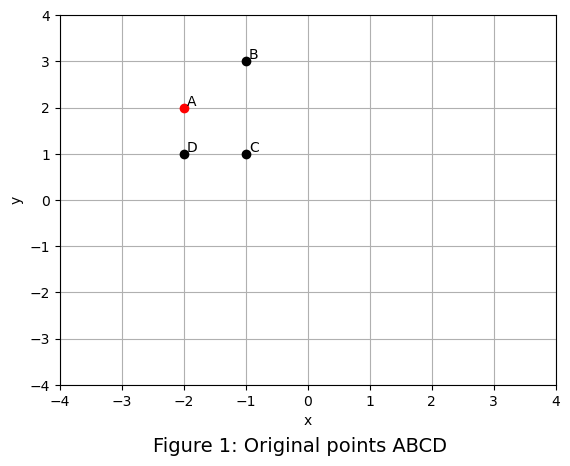

In [56]:
A=np.array([[-2,2]]).T  #transposition
print('A=',A,'\n')
print(A.shape)
print('\n')
B=np.array([[-1,3]]).T
C=np.array([[-1,1]]).T
D=np.array([[-2,1]]).T

import matplotlib.pyplot as plt
plt.figure() # create a new figure
plt.plot(A[0],A[1],'ro'), plt.text(A[0]+0.05,A[1]+0.05,'A') # create A to the right of the point
plt.plot(B[0],B[1],'ko'), plt.text(B[0]+0.05,B[1]+0.05,'B')
plt.plot(C[0],C[1],'ko'), plt.text(C[0]+0.05,C[1]+0.05,'C')
plt.plot(D[0],D[1],'ko'), plt.text(D[0]+0.05,D[1]+0.05,'D')
plt.grid('on')
plt.axis([-4,4,-4,4])
plt.xlabel('x')
plt.ylabel('y');
cap1='Figure 1: Original points ABCD'
plt.figtext(0.5, -0.03, cap1, wrap=True, horizontalalignment='center', fontsize=14) 
# 0.5, -0.03 is the text 'Figure 1: Original points ABCD' position  wrap is line wrap 换行 horizontalalignment水平对齐

Suppose that we wanted to translate the points (A-D) three units to the right and two units down. We could add 3 to the x coordinate of each point and subtract 2 from the y coordinate of each point. Or we could do this in matrix form:

**$$ A' = A + t $$**

$$ \begin{bmatrix}x' \\ y'\end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} 3 \\-2 \end{bmatrix} $$

The new coordinates of point A or A' are calculated below:  

In [57]:
t = np.array([[3, -2]]).T
Aprime = A + t
print('A = ', A.T,'\n')
print('t = ', t.T,'\n')
print('A\' = ', Aprime.T,'\n')
Bprime = B + t
Cprime = C + t
Dprime = D + t

A =  [[-2  2]] 

t =  [[ 3 -2]] 

A' =  [[1 0]] 


Text(0.5, -0.03, "Figure 2: Original points ABCD and translated points A'B'C'D'")

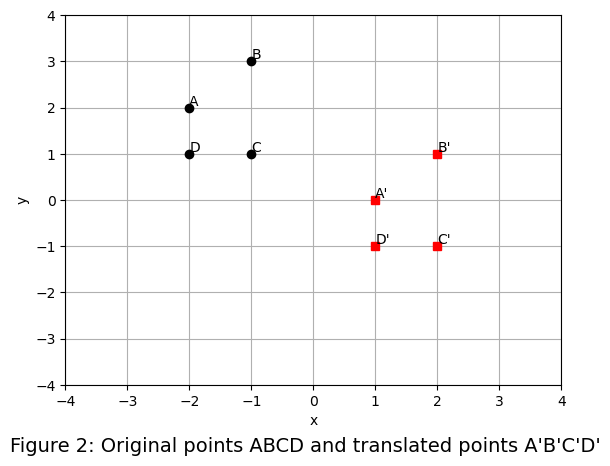

In [58]:
plt.figure()
plt.plot(A[0],A[1],'ko'), plt.text(A[0],A[1]+0.05,'A')
plt.plot(B[0],B[1],'ko'), plt.text(B[0],B[1]+0.05,'B')
plt.plot(C[0],C[1],'ko'), plt.text(C[0],C[1]+0.05,'C')
plt.plot(D[0],D[1],'ko'), plt.text(D[0],D[1]+0.05,'D')

plt.plot(Aprime[0],Aprime[1],'rs'), plt.text(Aprime[0],Aprime[1]+0.05,'A\'')
plt.plot(Bprime[0],Bprime[1],'rs'), plt.text(Bprime[0],Bprime[1]+0.05,'B\'')
plt.plot(Cprime[0],Cprime[1],'rs'), plt.text(Cprime[0],Cprime[1]+0.05,'C\'')
plt.plot(Dprime[0],Dprime[1],'rs'), plt.text(Dprime[0],Dprime[1]+0.05,'D\'')
plt.grid('on')
plt.axis([-4,4,-4,4])
plt.xlabel('x')
plt.ylabel('y')
cap2="Figure 2: Original points ABCD and translated points A'B'C'D'"
plt.figtext(0.5, -0.03, cap2, wrap=True, horizontalalignment='center', fontsize=14)

#### Rotations

Now suppose we wanted to rotate the original points A to D through a specified angle. You could use the following equations to rotate the x and y coordinates:

$$ x' = x cos (\phi) +  y sin (\phi) $$
$$ y' = -x sin (\phi) + y cos (\phi) $$

Which written in matrix form become:

$$ \begin{bmatrix}x' \\ y' \end{bmatrix} = \begin{bmatrix} cos(\phi) & sin(\phi) \\ -sin(\phi) & cos(\phi) \end{bmatrix} \begin{bmatrix}x \\ y \end{bmatrix}  $$

A quick check should show that if we rotate the initial values x and y through an angle of 360 degrees the new values should lie on top of the original values.

r =  [[-1.0000000e+00  1.2246468e-16]
 [-1.2246468e-16 -1.0000000e+00]] 


Text(0.5, -0.03, "Figure 3: Original points ABCD and rotated points A'B'C'D'")

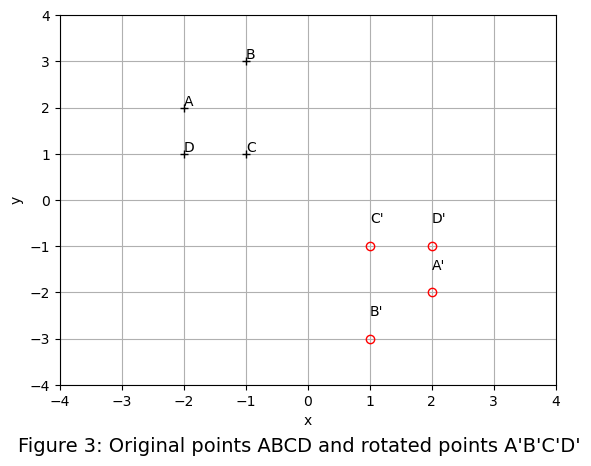

In [59]:
phi=180*np.pi/180

r = np.ones([2,2])

r[0,0]=np.cos(phi)
r[0,1]=np.sin(phi)
r[1,0]=-np.sin(phi)
r[1,1]=np.cos(phi)

print('r = ',r,'\n')

Aprime = np.dot(r,A) # note we need to use the dot product.
Bprime = np.dot(r,B)
Cprime = np.dot(r,C)
Dprime = np.dot(r,D)


plt.figure()
plt.plot(A[0],A[1],'k+'), plt.text(A[0],A[1]+0.05,'A')
plt.plot(B[0],B[1],'k+'), plt.text(B[0],B[1]+0.05,'B')
plt.plot(C[0],C[1],'k+'), plt.text(C[0],C[1]+0.05,'C')
plt.plot(D[0],D[1],'k+'), plt.text(D[0],D[1]+0.05,'D')

plt.plot(Aprime[0],Aprime[1],'ro',markerfacecolor='none'), plt.text(Aprime[0],Aprime[1]+0.5,'A\'')
plt.plot(Bprime[0],Bprime[1],'ro',markerfacecolor='none'), plt.text(Bprime[0],Bprime[1]+0.5,'B\'')
plt.plot(Cprime[0],Cprime[1],'ro',markerfacecolor='none'), plt.text(Cprime[0],Cprime[1]+0.5,'C\'')
plt.plot(Dprime[0],Dprime[1],'ro',markerfacecolor='none'), plt.text(Dprime[0],Dprime[1]+0.5,'D\'')
plt.grid('on')
plt.axis([-4,4,-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.plot()
cap3="Figure 3: Original points ABCD and rotated points A'B'C'D'"
plt.figtext(0.5, -0.03, cap3, wrap=True, horizontalalignment='center', fontsize=14)


So what happens if you were to rotate points (A-D) through an angle of 90 degrees?



## 4 Solving Systems of Linear Equations


Consider the following system of simultaneous equations:

$$ 2X - 2Y + Z = 3 $$

$$ 3X + Y - Z = 7 $$
$$ X - 3Y + 2Z = 0$$

We can write this in matrix form as follows:

$$A = \left[\begin{matrix} 2 & -2 & 1 \\ 3 & 1 & -1 \\ 1 & -3 & 2 \end{matrix} \right]$$

And the vectors of unknowns, **x**, and the right-hand side, **b**, as:

$$ x = \left[ \begin{matrix} X \\ Y \\ Z \end{matrix} \right]$$, $$ b = \left[ \begin{matrix} 3 \\ 7 \\ 0 \end{matrix} \right]$$

We can write the above system of three equations in matrix form as:

$$\left[\begin{matrix} 2 & -2 & 1 \\ 3 & 1 & -1 \\ 1 & -3 & 2 \end{matrix} \right] \left[ \begin{matrix} X \\ Y \\ Z \end{matrix} \right] = \left[ \begin{matrix} 3 \\ 7 \\ 0 \end{matrix} \right] $$

Or more concisely as the single matrix equation $$ Ax=b$$

The solution of which may be written as: $$x = A^{-1}b$$

Where **$A^{-1}$** is the matrix inverse of **A**.

Now use python to solve this system of equations:

**from numpy.linalg.linalg import solve ** : solve function is used to solve the eqation of $x = A^{-1}b$

In [60]:
import numpy.linalg as la #we need to import the linear algebra functions
from numpy.linalg.linalg import lstsq  #求解超定方程
from numpy.linalg.linalg import solve  # 求解线性方程
A = np.array([[2, -2, 1],[3, 1, -1],[1, -3, 2]])
b = np.array([[3, 7, 0]]).T
x = solve(A,b)
print('A = ',A ,'\n')
print('b = ',b ,'\n')
print('x=',np.round(x,2))

A =  [[ 2 -2  1]
 [ 3  1 -1]
 [ 1 -3  2]] 

b =  [[3]
 [7]
 [0]] 

x= [[ 2.]
 [ 0.]
 [-1.]]


The **solve** function will only find the solution for a fully determined case, where the number of equations is equal to the number of unknowns, and **A** is a square matrix. In order to confirm that python has calculated the solution to the system of equations, calculate the residual (a measure of the accuracy of the solution) using the **numpy** dot product function **dot**:
$$r = Ax - b$$


In [61]:
r = np.dot(A, x) - b
print('r=',r,'\n')
print(np.allclose(np.dot(A, x), b))
'''The numpy allclose command checks whether two variables are closer than a tolerance. You can specify the tolerance or use a default value.'''

r= [[4.44089210e-16]
 [8.88178420e-16]
 [6.66133815e-16]] 

True


'The numpy allclose command checks whether two variables are closer than a tolerance. You can specify the tolerance or use a default value.'

## 5 Solving Systems of over and under determined Equations

In this case that the system is over determined, where we have more equations than unknowns, we can’t use the **solve** function.  We can use the **lstsq** （ LeaST SQuare 最小二乘法-用最小二乘法拟合数据得到一个形如y = mx + c的线性方程）function which for over and under determined systems solves by least squares, for the fully determined system it produces an exact solution.

So now solve the following over determined system of simultaneous equations:
$$X - Y = 0$$
$$ Y = 2$$
$$ X = 1$$

First write this in matrix form, **$Ax=b$**

$$\left[\begin{matrix}1 & -1 \\0 & 1\\1 & 0 \end{matrix} \right] \left[\begin{matrix} X \\ Y \end{matrix} \right] = \left[\begin{matrix}0 \\ 2 \\ 1 \end{matrix} \right]$$


### Linear regression 线性回归 using `lstsq`

The `lstsq` function minimises the vertical error (the sum of the squares of the error) between a best fit line and the data.

In the example below, the `lstsq` function is used to fit a best fit trendline to some noisy data which has the general form of the equation of a straight line $y = mx + c$.

x =  [ 0  1  2  3  4  5  6  7  8  9 10] 

y =  [-0.6  3.6  7.3  8.9 16.  16.2 19.6 23.2 32.  39.1 31.2] 

A =  [[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]] 

m =  3.702727272727274 

c =  -0.650000000000006 


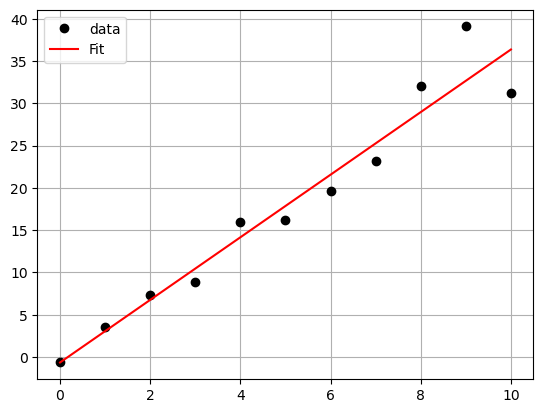

In [62]:
%reset -f
import numpy as np 
import matplotlib.pyplot as plt  #importing pyplot from matplotlib 
import numpy.linalg as la #we need to import the linear algebra functions
from numpy.linalg.linalg import lstsq  #求解超定方程
x=np.arange(0,11)
y=np.array([-0.6,3.6,7.3,8.9,16.0,16.2,19.6,23.2,32.0,39.1,31.2])

print('x = ',x,'\n')
print('y = ',y,'\n')

#Plot original data
plt.figure()
plt.plot(x,y,'ko')
plt.grid()

# Create matrix form of y = mx + c
A=np.vstack([x, np.ones(len(x))]).T #in this case vstack function creates a vertical stack of x above an array ones.
print('A = ',A,'\n')

#solve using least squares
m,c = lstsq(A,y, rcond=None)[0]  #[0] 指的是返回斜率和截距 slope and intercept

print('m = ',m,'\n')
print('c = ',c,'\n')
yfit=m*x+c

plt.plot(x,yfit,'r-')
plt.legend(['data','Fit'])

Now write the equation of a straight line $y=mx+c$ in matrix form:

We can rewrite the line equation as $y = Ap$, where $A = \begin{bmatrix} x & 1 \end{bmatrix}$ and $p = \begin{bmatrix} m \\ c \end{bmatrix}$. Now use lstsq to solve for p:

In [63]:
p=np.array([m,c])
A@p #Compute the matrix product to check，we got the results of the trend line

array([-0.65      ,  3.05272727,  6.75545455, 10.45818182, 14.16090909,
       17.86363636, 21.56636364, 25.26909091, 28.97181818, 32.67454545,
       36.37727273])

In [64]:
p = np.array([m,c])
print(np.allclose(yfit,y,rtol=0.2),'\n') #relative tolerance of 20%

compareY=np.vstack([y,yfit]).T
print('Compare Y = \n',compareY)  # print the results of the trend line and original results. 

True 

Compare Y = 
 [[-0.6        -0.65      ]
 [ 3.6         3.05272727]
 [ 7.3         6.75545455]
 [ 8.9        10.45818182]
 [16.         14.16090909]
 [16.2        17.86363636]
 [19.6        21.56636364]
 [23.2        25.26909091]
 [32.         28.97181818]
 [39.1        32.67454545]
 [31.2        36.37727273]]


So now solve the following over determined system of simultaneous equations:
$$X - Y = 0$$
$$ Y = 2$$
$$ X = 1$$

First write this in matrix form, **$Ax=b$**

$$\left[\begin{matrix}1 & -1 \\0 & 1\\1 & 0 \end{matrix} \right] \left[\begin{matrix} X \\ Y \end{matrix} \right] = \left[\begin{matrix}0 \\ 2 \\ 1 \end{matrix} \right]$$



Now use python to solve this system of equations:

In [65]:
%reset -f
import numpy as np 
import numpy.linalg as la #we need to import the linear algebra functions
from numpy.linalg.linalg import lstsq  #求解超定方程
A = np.array([[1, 0, 1],[-1, 1 ,0]]).T
b = np.array([[0,2, 1]]).T
print('A=',A,'\n')
print('b=',b,'\n')
[x,r,rank,s] = la.lstsq(A, b, rcond=None) 
#The full output gives the solution x and resisudals r, rcond用来处理回归中的异常值，一般不用。
#lstsq的输出包括四部分：回归系数（斜率和截距）、残差平方和、自变量X的秩、X的奇异值。
print('x=',x)
print('r=',r)

A= [[ 1 -1]
 [ 0  1]
 [ 1  0]] 

b= [[0]
 [2]
 [1]] 

x= [[1.33333333]
 [1.66666667]]
r= [0.33333333]


In [66]:
# It is also possible to calculate the residuals
r2 = np.dot(A, x) - b
print('r=',r2)
print(np.allclose(np.dot(A, x), b)) #Determines if element of two arrays are within a tolerance

r= [[-0.33333333]
 [-0.33333333]
 [ 0.33333333]]
False


Now try solving the under determined systems of equations using `la.lstsq`, where there are less equations than unknowns.

Solve the following simultaneous equations:
    $$x + y + z = 1$$
    $$x + y + 2z = 3$$

- Write the equation in the matrix form, **$Ax = b$**
- Find the solution vector **$x$**.
- Confirm that python has indeed found the solution by computing the residuals.



In [67]:
A = np.array([[1, 1, 1],[1, 1 ,2]])
b = np.array([[1, 3]]).T

print('A=',A,'\n')
print('b=',b,'\n')

x = la.lstsq(A, b, rcond=None)[0]
print('x=',x,'\n')

r = np.dot(A, x) - b
print('r=',r)

A= [[1 1 1]
 [1 1 2]] 

b= [[1]
 [3]] 

x= [[-0.5]
 [-0.5]
 [ 2. ]] 

r= [[-3.33066907e-16]
 [ 0.00000000e+00]]


## 6 Curve Fitting

Curve fitting is one of the most common task you will want to carry out in computing. Suppose of you have set of data points $(x_i, y_i)$ where $i=1,2,3...N$ and you want to determine values of y between those specified. You could fit a function to the data, usually some sort of polynomial(多项式）, which will fit the data but can produce poor results outside of the range of data.

A linear fit to this data will be quite poor.

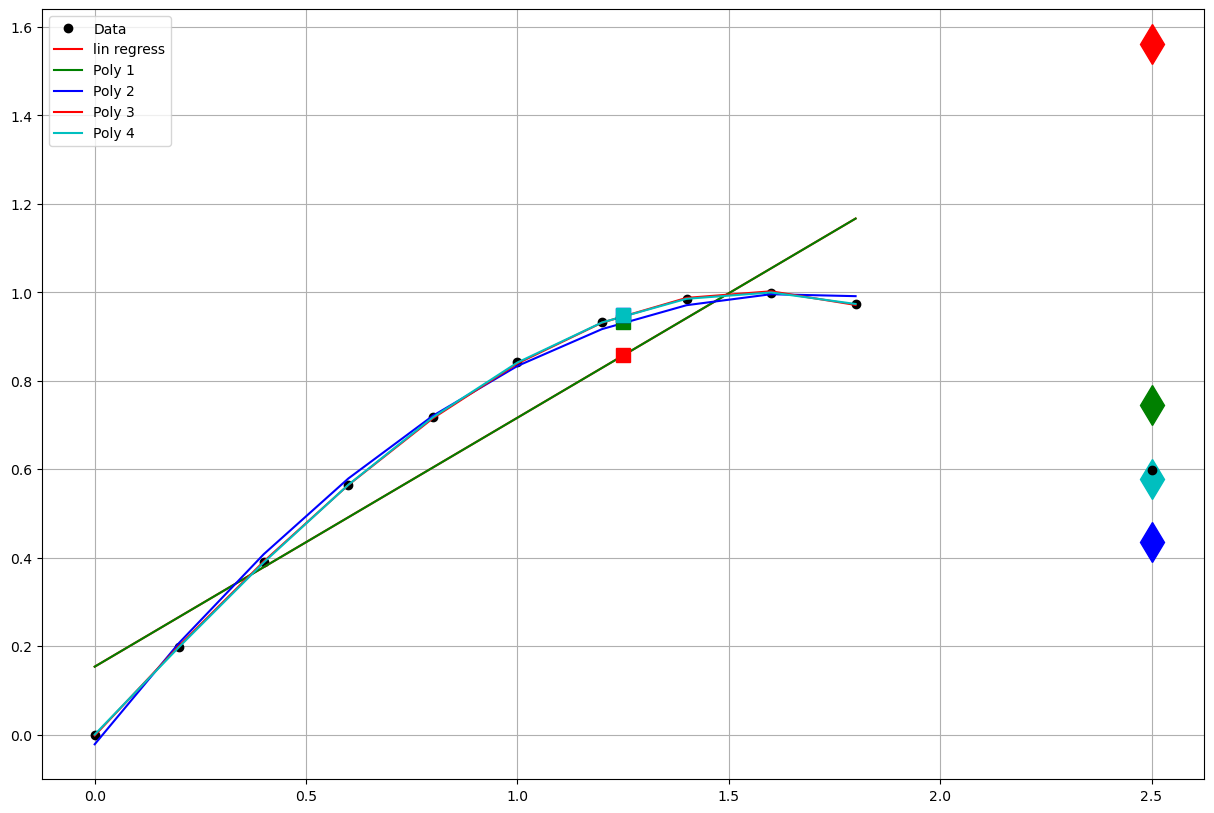

In [68]:
import matplotlib.pyplot as plt  #importing pyplot from matplotlib 
from numpy.polynomial import polynomial as P
x=np.arange(0,2,0.2)
y=np.sin(x)
plt.figure(figsize=(15,10))
plt.plot(x,y,'ko')
plt.grid()

# Linear regression using lstsq
A=np.vstack([x, np.ones(len(x))]).T
m,c=lstsq(A,y, rcond=None)[0]
yfit=m*x+c
plt.plot(x,yfit,'r-')

# Polynomial Curve Fit - 1st order same as linear regression using lstsq 多项式曲线拟合
c1, r1 = P.polyfit(x,y,1,full=True)
yfit1=c1[1]*x+c1[0]
plt.plot(x,yfit1,'g-')

# Polynomial Curve Fit - 2nd order
c2, r2 = P.polyfit(x,y,2,full=True)
yfit2=c2[2]*x**2+c2[1]*x+c2[0]
plt.plot(x,yfit2,'b-')

# Polynomial Curve Fit - 3rd order
c3, r3 = P.polyfit(x,y,3,full=True)
yfit3=c3[3]*x**3+c3[2]*x**2+c3[1]*x+c3[0]
plt.plot(x,yfit3,'r-')

# Polynomial Curve Fit - 4th order
c4, r4 = P.polyfit(x,y,4,full=True)
yfit4=c4[4]*x**4+c4[3]*x**3+c4[2]*x**2+c4[1]*x+c4[0]
plt.plot(x,yfit4,'c-')

plt.legend(['Data','lin regress','Poly 1','Poly 2','Poly 3','Poly 4'])

# The R^2 value - or the error.
R1=np.round(1-r1[0],4)[0]
R2=np.round(1-r2[0],4)[0]
R3=np.round(1-r3[0],4)[0]
R4=np.round(1-r4[0],4)[0]

# The value of y at x=1.25 for the different curve fits
x1=1.25 #范围之内
y1=np.round(c1[1]*x1+c1[0],4)
y2=np.round(c2[2]*x1**2+c2[1]*x1+c2[0],4)
y3=np.round(c3[3]*x1**3+c3[2]*x1**2+c3[1]*x1+c3[0],4)
y4=np.round(c4[4]*x1**4+c4[3]*x1**3+c4[2]*x1**2+c4[1]*x1+c4[0],4)

# The value of y at x=2.5 for the different curve fits
x2=2.5  #范围之外
y11=np.round(c1[1]*x2+c1[0],4)
y22=np.round(c2[2]*x2**2+c2[1]*x2+c2[0],4)
y33=np.round(c3[3]*x2**3+c3[2]*x2**2+c3[1]*x2+c3[0],4)
y44=np.round(c4[4]*x2**4+c4[3]*x2**3+c4[2]*x2**2+c4[1]*x2+c4[0],4)

plt.plot(x1,y1,'rs',markersize=10)
plt.plot(x1,y2,'gs',markersize=10)
plt.plot(x1,y3,'bs',markersize=10)
plt.plot(x1,y4,'cs',markersize=10)

plt.plot(x2,y11,'rd',markersize=20)
plt.plot(x2,y22,'gd',markersize=20)
plt.plot(x2,y33,'bd',markersize=20)
plt.plot(x2,y44,'cd',markersize=20)

y=np.sin(x2)
plt.plot(x2,y,'ko')


Based on the curve fits it is possible to determine the value at any intermediate x value between 0 and 2. For example, the value of y at x=1.25.

However, strange things can happen when you try to evaluate the polynomial functions outside the range 0 to 2. For example if we try and evaluate y at x=2.5; Here you can see the results are quite varied. Plotting the polynomials over a wider range should illustrate what is happening.


| Degree 	| $R^2$ 	|    y@x=1.25   | y@x=2.5  |
|--------	|----	    |--------| ----------|
| 1      	|   0.8851 	| 0.8573 |  1.561  |
| 2      	|   0.998 	| 0.9331 |  0.7457  |
| 3      	|   1.0   	| 0.9491 |  0.435   |
| 4         |   1.0     | 0.9488 |  0.577   |

The true value of $y=sin(x)$ at x=2.5 is 0.6, but the presiction from the different curve fits varies between 0.435 and 1.561.

### Interpolation

An alternative to fitting a polynomial curve to the data in order to find an intermediate point, is to use interpolation. 
In this tutorial you will only look at interpolation in 1 dimension. But there are 2D and higher dimension methods.
Within 1D interpolation, there are the following methods:
- nearest neighbour
- linear
- quadratic (requires at least 3 data points)
- cubic (requires at least 4 data points)

With some of the methods, there is the option to extrapolate outside the defined range.

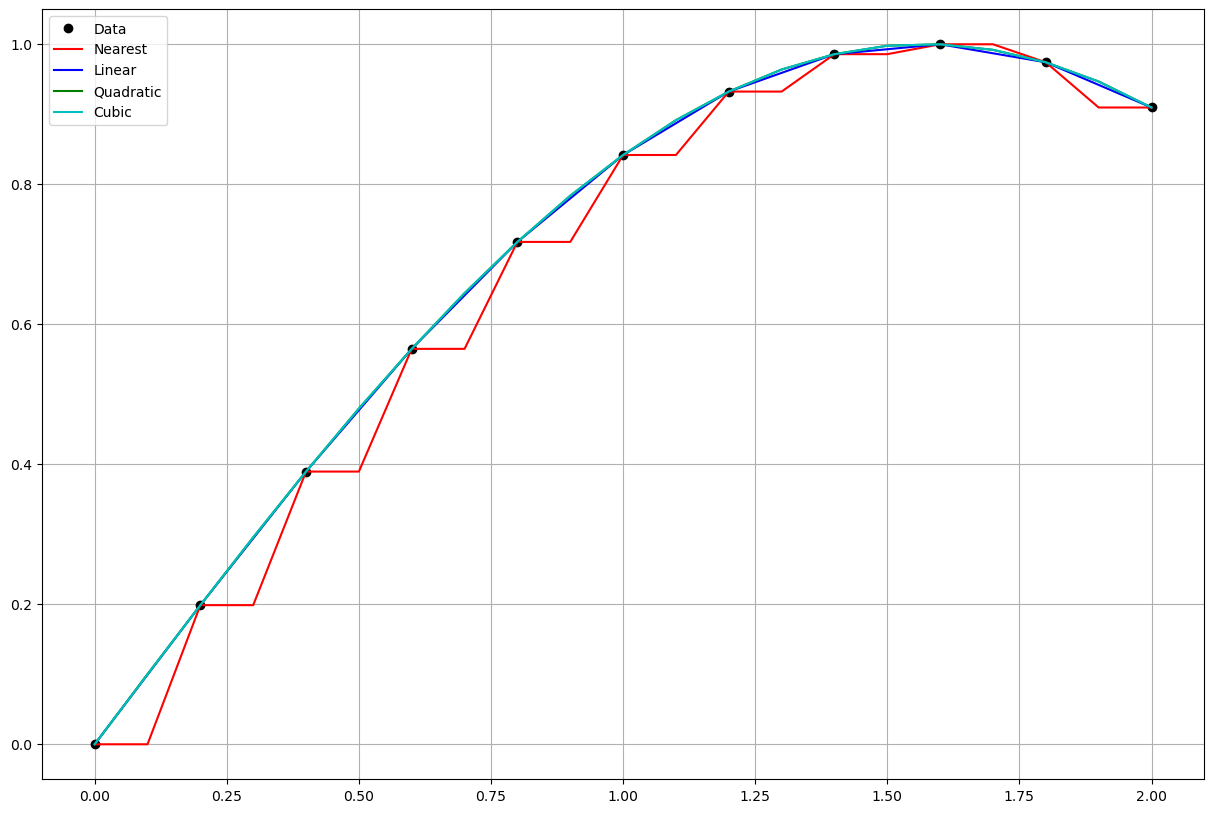

In [69]:
x=np.arange(0,2.2,0.2)
y=np.sin(x)
plt.figure(figsize=(15,10))
plt.plot(x,y,'ko')
plt.grid()

from scipy.interpolate import interp1d

xi=np.arange(0,2.1,0.1)
f1=interp1d(x,y,kind='nearest')
y1=f1(xi)
plt.plot(xi,y1,'r-')


f1=interp1d(x,y,kind='linear')
y1=f1(xi)
plt.plot(xi,y1,'b-')

f1=interp1d(x,y,kind='quadratic')
y1=f1(xi)
plt.plot(xi,y1,'g-')

f1=interp1d(x,y,kind='cubic')
y1=f1(xi)
plt.plot(xi,y1,'c-')
plt.legend(['Data','Nearest','Linear','Quadratic','Cubic'])

## 6 Statistics

Finally, there a many useful functions within the NumPy module, but often you may just want to calculate some simple statistics such as mean, standard deviation, maximum and minimum values.

In [70]:
#Create an array.
A=np.random.randn(10)
print('A=\n',A)
print('mean of A = {}'.format(np.mean(A)))
print('standard deviation of A = {}'.format(np.std(A)))
print('minimum value of A = {}'.format(np.min(A)))
print('maximum value of A = {}'.format(np.max(A)))
print('Index of minimum value of A = {}'.format(np.argmin(A)))
print('Index of maximum value of A = {}'.format(np.argmax(A)))
print('A sorted in ascending order =',np.sort(A))

A=
 [ 1.59521335 -2.14586205 -0.23894629  2.08393962  0.24334469 -1.44597495
 -1.39343529  0.87599386  0.34547231  0.373635  ]
mean of A = 0.029338025521787187
standard deviation of A = 1.2906883274882017
minimum value of A = -2.14586205277723
maximum value of A = 2.0839396155136183
Index of minimum value of A = 1
Index of maximum value of A = 3
A sorted in ascending order = [-2.14586205 -1.44597495 -1.39343529 -0.23894629  0.24334469  0.34547231
  0.373635    0.87599386  1.59521335  2.08393962]


## 7 Exercise

## Question 1

use python to solve the following simutaneous equations

$$-2x -3y - z = -16 $$
$$-x +5 y + 6z = 5$$
$$-2x -4 y + 6z = -34$$
what are the values of x, y, z

## Question 2
use python to solve the following simutaneous equations
$$-3y - z = -10 $$
$$3 y -3z = 18$$
$$-4 y +5z =-26$$

what are the values of y, z

## Question 3
use python to solve the following simutaneous equations

$$-3x -9y - 4z = -23 $$
$$6x -8 y +7z =-5$$

what are the values of x, y, z

## Question 4

Some experimental data which should have a straight line trend is given below：

|x |y |
|:-----|:---|
|0|13|
|1|2.5|
|2|-24|
|3|-17.5|
|4|-37|
|5|-52.5|
|6|-57|
|7|-63.5|
|8|-83|
|9|-91.5|
|10|-96|

Calculate a best fit line which fits through this data using the numpy lstsq function.
Return the values of m and c determined by the lstsq function.

## 8 Regular assignment

Please finish a jupyter notebook for FT and FFT

FT: https://space.bilibili.com/230105574

10 marks 

Submit to teaching assistant: 27th Sep 2023